#### Components of Time Series
- Trend:
  - The long-term direction in the data (e.g., increasing or decreasing sales).
- Seasonality:
  - Patterns that repeat at regular intervals (e.g., sales increasing during the holiday season).
- Cyclical:
  - Long-term fluctuations that are not of fixed period (e.g., economic cycles).
- Irregular:
  - Random fluctuations remaining after removing trend and seasonal components

# **Trend**
- **Trend** in time series analysis refers to the long-term movement or direction in the data over a period of time.
- It indicates the overall trajectory of the data points, showing whether they are increasing, decreasing, or remaining stable.


### **Key Characteristics of Trends:**
**Direction:**
Upward Trend:
-  The values generally increase over time (e.g., sales growth, rising stock prices).
Downward Trend:
- The values generally decrease over time (e.g., declining sales, decreasing population).
Horizontal Trend:
- The values fluctuate around a constant level without any clear increase or decrease.

Duration:
- Trends can vary in duration, ranging from short-term (e.g., a few months) to long-term (e.g., several years).

Causes:
- Trends can be influenced by various factors, including economic conditions, technological advancements, changes in consumer behavior, or environmental factors.

Examples of Trend Analysis:
- Stock Prices:
  - A stock price may show an upward trend over several months if the company is performing well financially.
- Sales Data:
  - A coffee shop may experience a downward trend in sales if it faces increased competition or changes in consumer preferences.
- Temperature Changes:
  - Climate data may show a long-term upward trend in average global temperatures due to climate change.

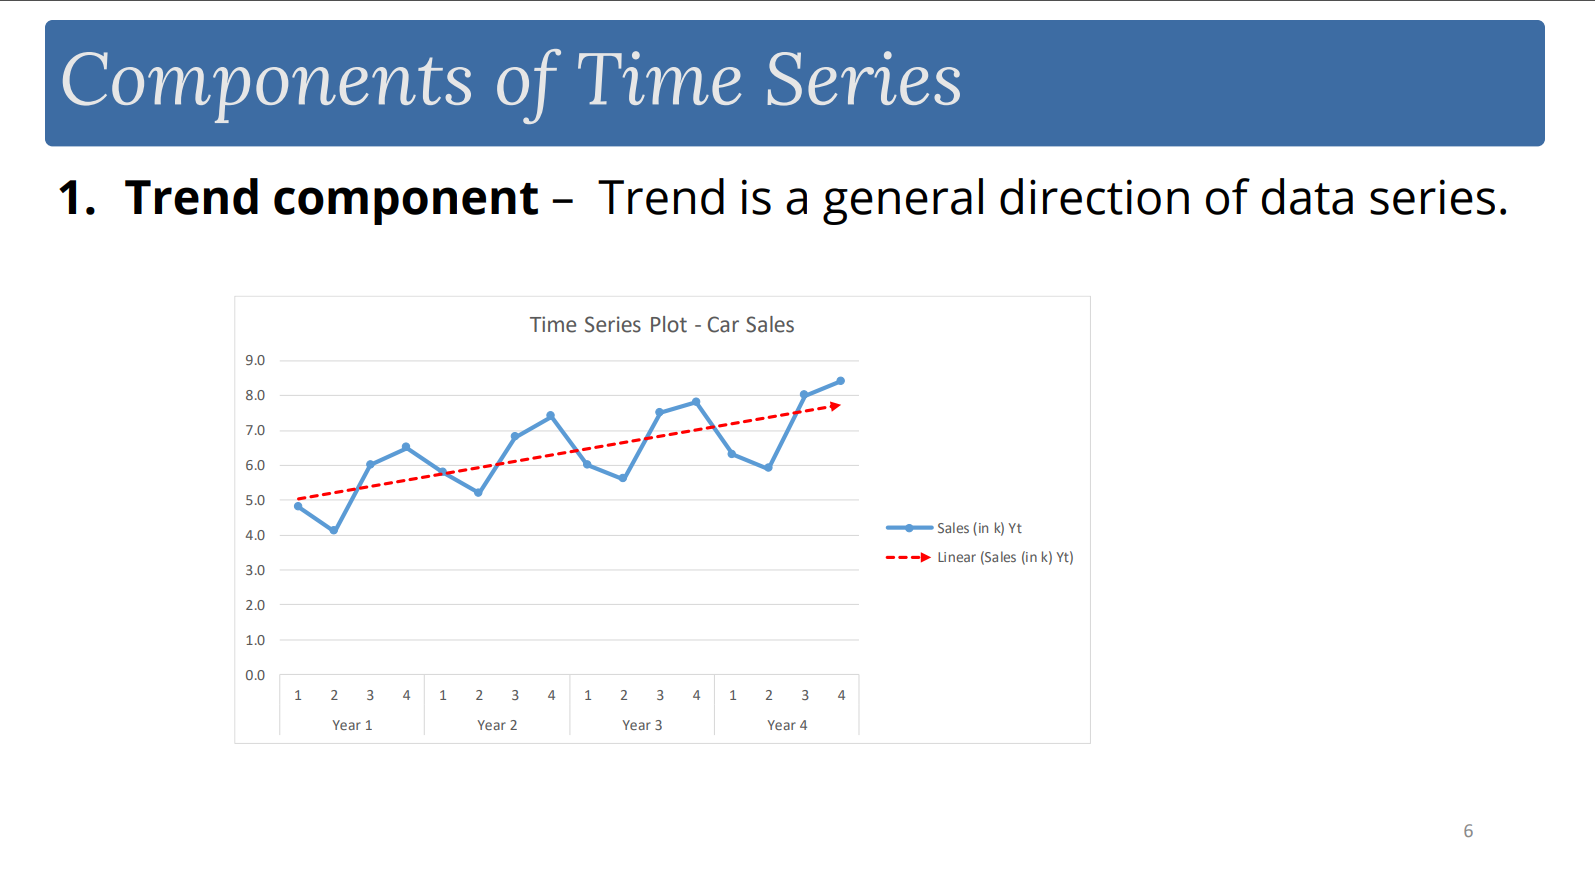

# **Seasonality Component**

In time series analysis, understanding the different components of the data is crucial for effective forecasting and analysis.
Here are the main components of a time series:

### **1. Seasonality**
- Definition:
 - Seasonality refers to regular and predictable changes that occur in a time series at specific intervals, usually within a year. This can be due to various factors like weather, holidays, or specific events.
- Characteristics:
 - It has a fixed and known frequency (e.g., daily, weekly, monthly, quarterly).
Patterns repeat at regular intervals.

- Examples:
 - Retail sales often peak during the holiday season.
 - Electricity consumption may increase during summer due to air conditioning.

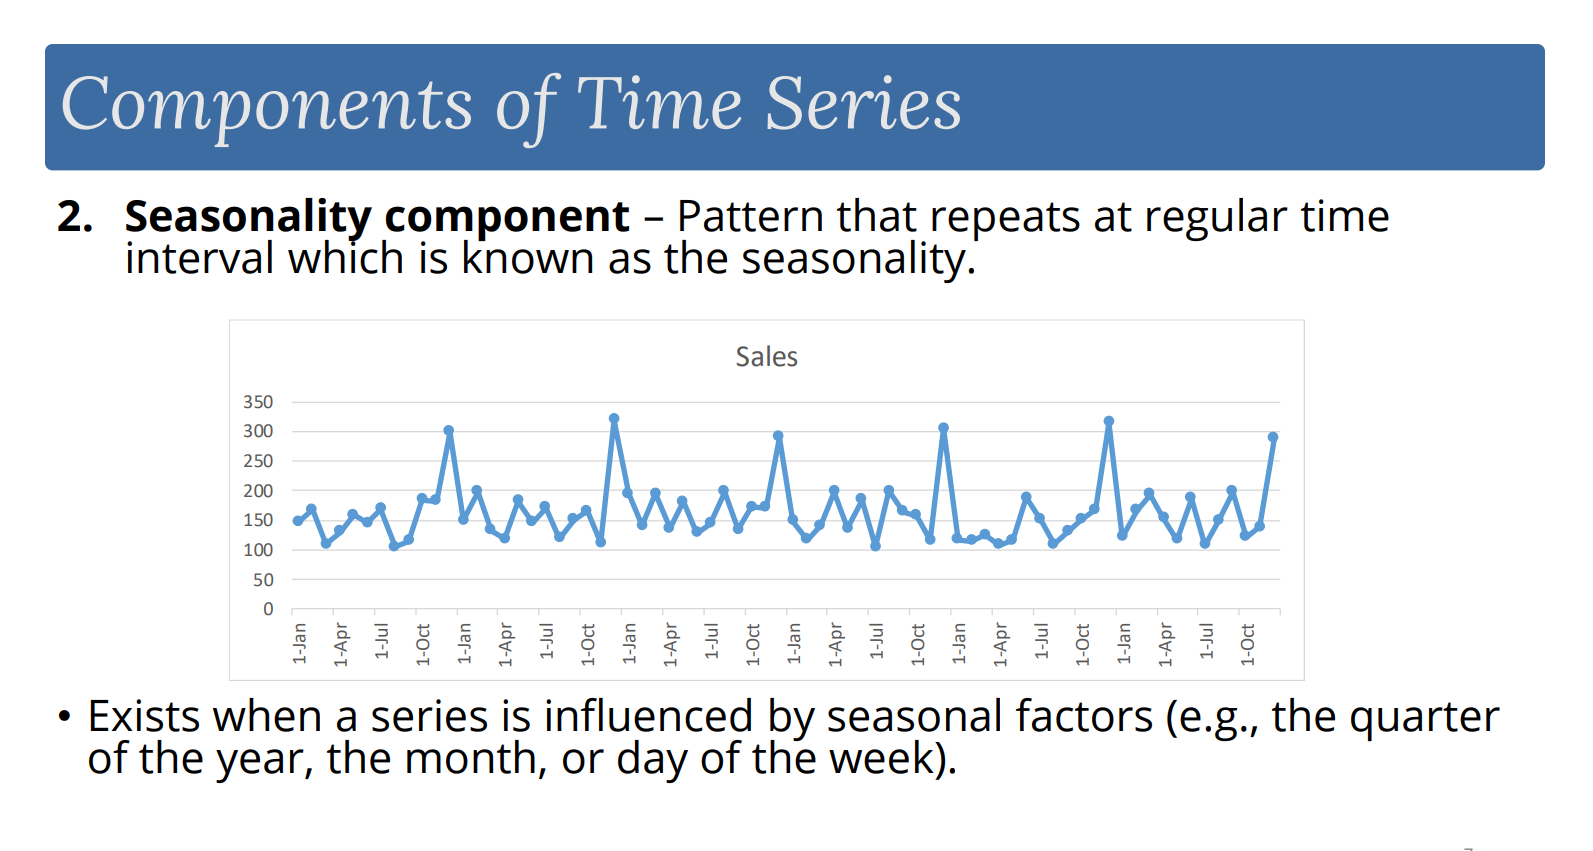

# **3. Cyclical Component**
- Definition:
  - The cyclical component reflects long-term fluctuations that occur over periods longer than one year, often related to economic or business cycles.
- Characteristics:
  - Unlike seasonality, cyclical patterns do not have a fixed frequency.
They can last for several years and are influenced by economic factors.
- Examples:
  - Business cycles of expansion and contraction in the economy.
Real estate prices may fluctuate in cycles based on economic growth.

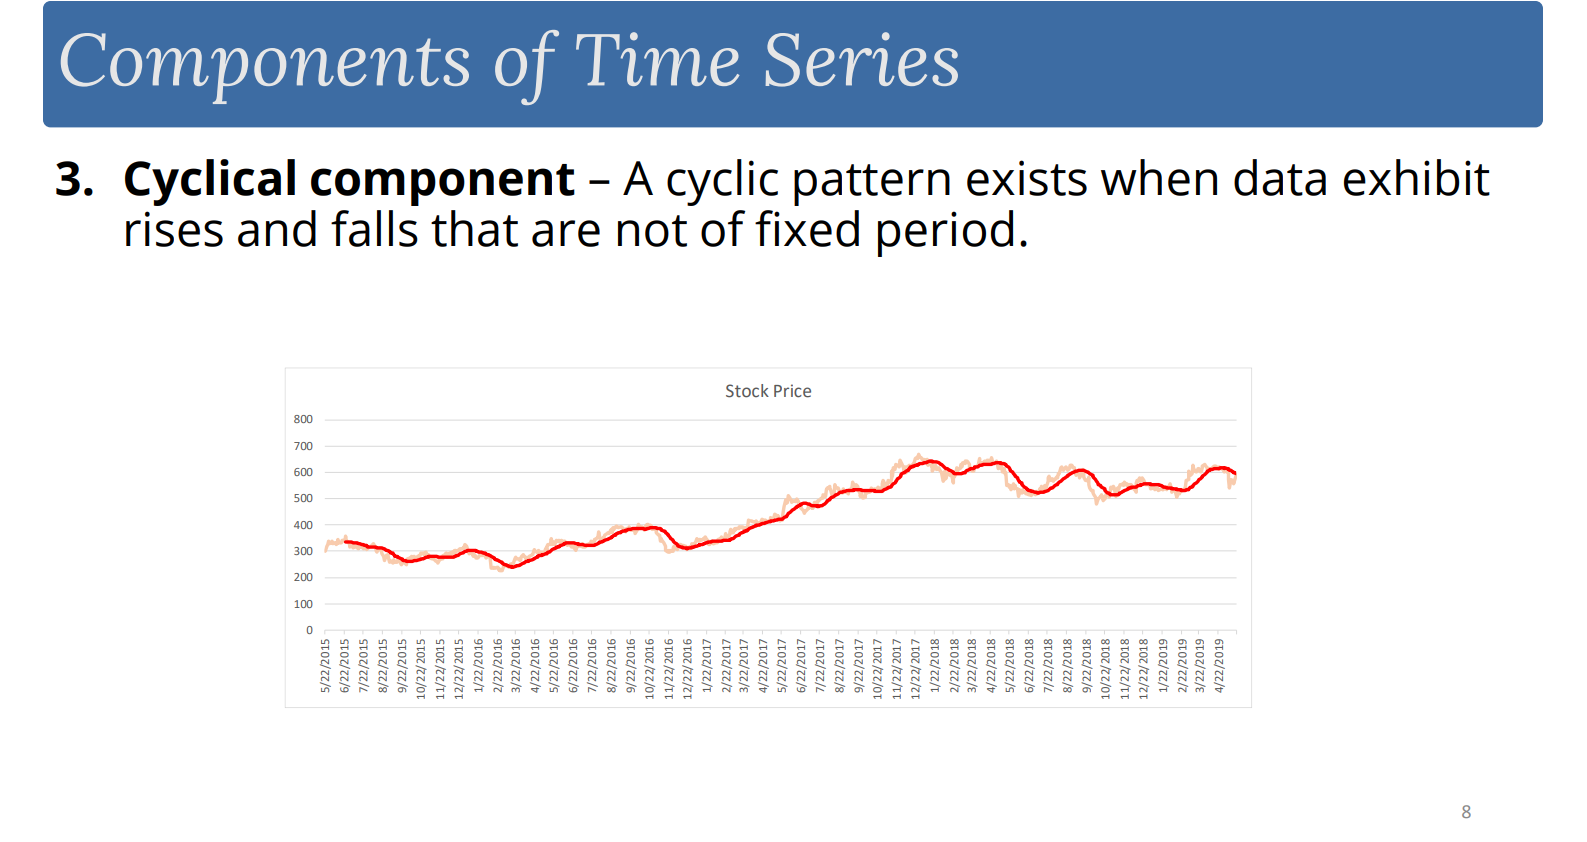

### **4. Irregular Component**
- Definition:
  - The irregular component (also known as the random or residual component) represents random, unpredictable variations in the data that cannot be attributed to the trend, seasonality, or cyclical effects.
- Characteristics:
  - It includes noise or random fluctuations in the data.
  - It can arise from unexpected events or anomalies (e.g., natural disasters, strikes).
- Examples:
  - A sudden spike in sales due to a viral marketing campaign.
  - A drop in production caused by an unexpected factory shutdown.

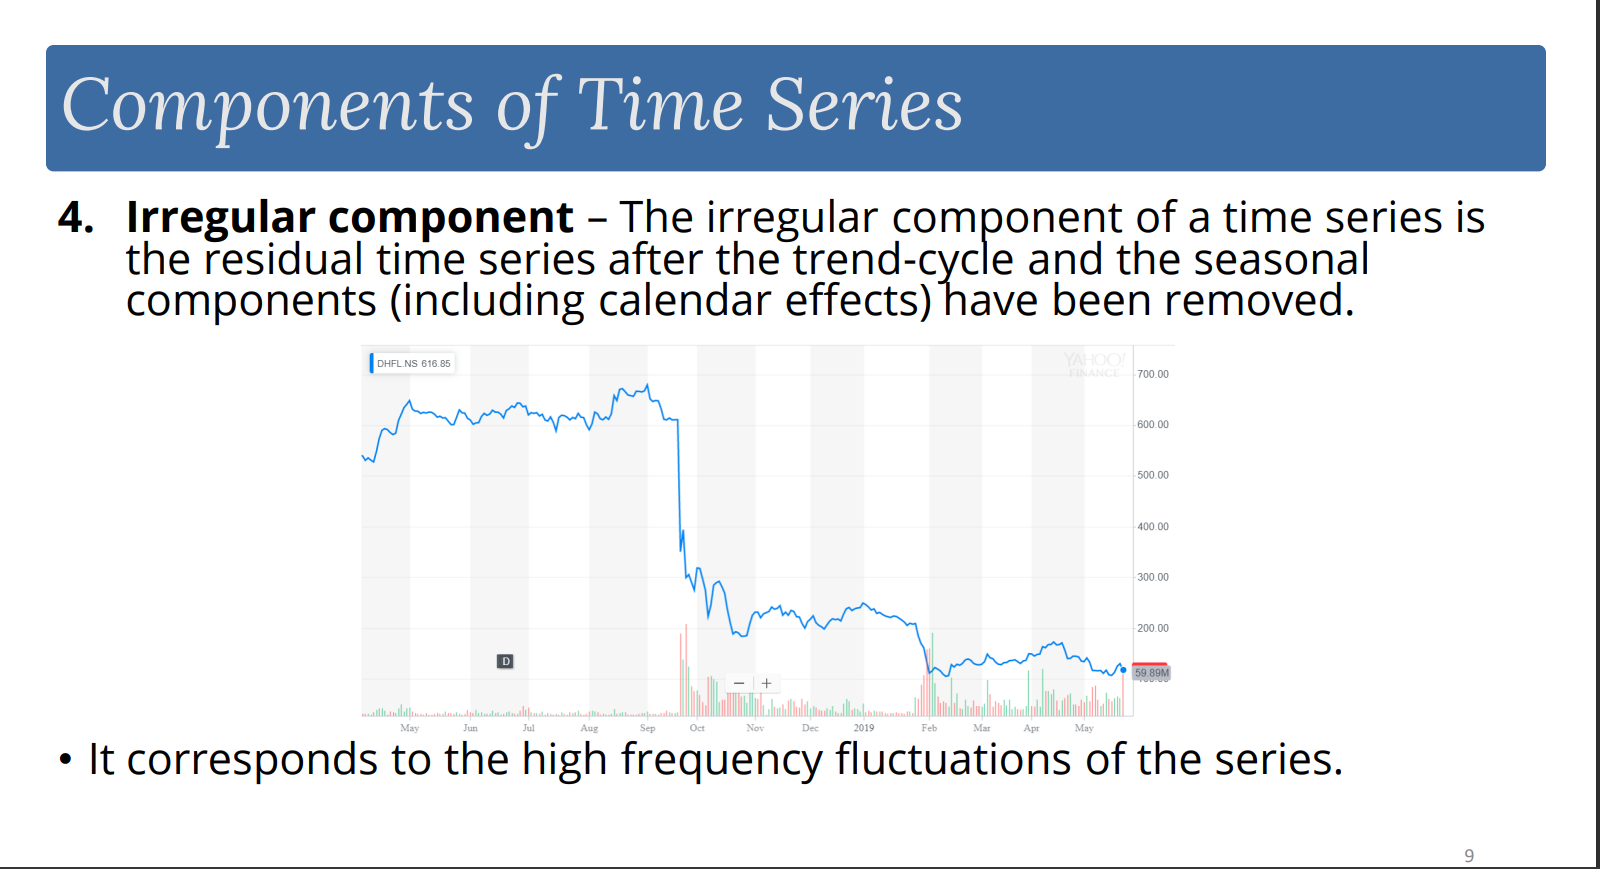

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
sns.get_dataset_names() #dataset in the seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
##Let we take the flights data
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


- let we take the each  Common date here,because we here dosen't have
- and combine them.
-

In [6]:
###
df['yearMonth'] = "01-"+df['year'].astype(str)+"-"+df['month'].astype(str)
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-1949-Jan
1,1949,Feb,118,01-1949-Feb
2,1949,Mar,132,01-1949-Mar
3,1949,Apr,129,01-1949-Apr
4,1949,May,121,01-1949-May


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


- Convert the YeatMoth to to_datetime()

In [8]:
df['yearMonth'] = pd.to_datetime(df['yearMonth'])
df.set_index('yearMonth',inplace= True)

In [9]:
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [10]:
df.drop(columns = ['year','month'])


,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

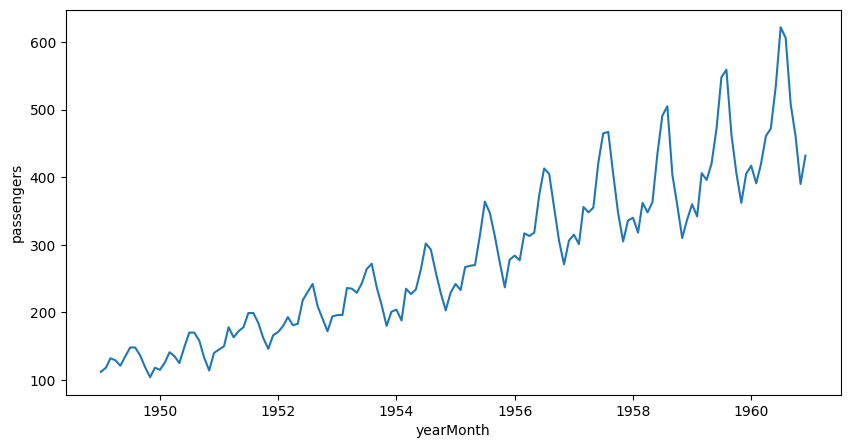

In [12]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x = df.index,y = df.passengers)
##Here ,it has the sesonality

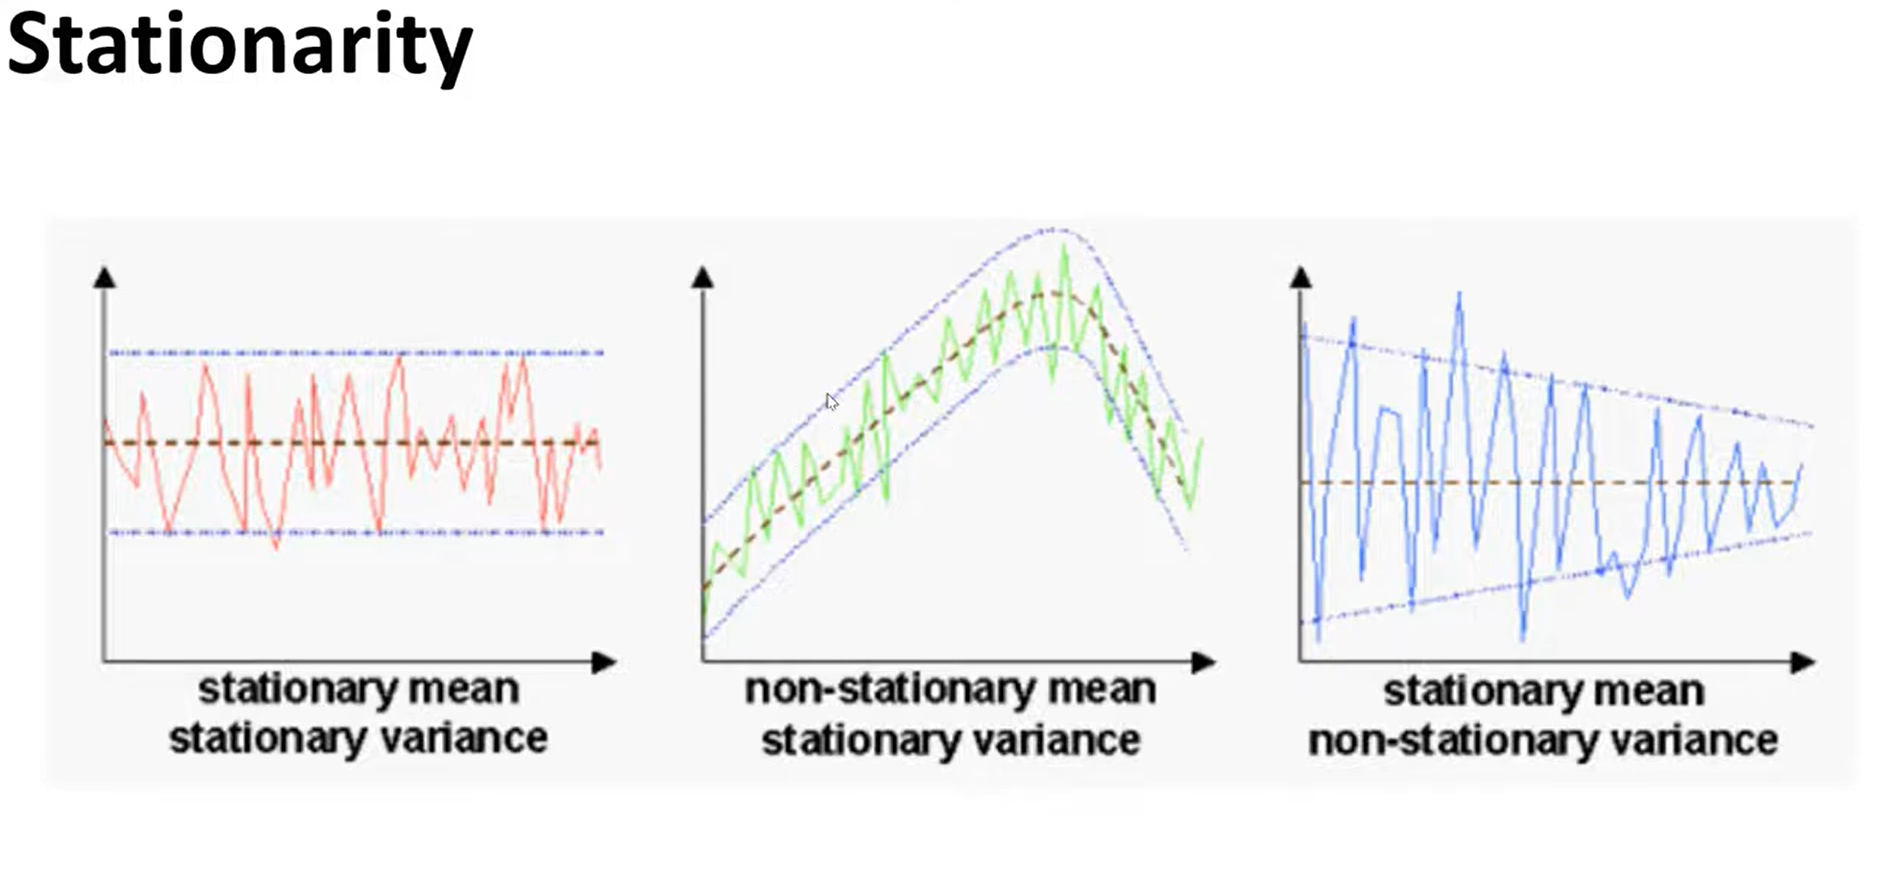

### **Stationarity**
- Time Series requires the data need to be Stationary.
- Most of the Time Series models work assuming the data is
Stationary.
- Stationarity means
 - Conatant mean according to the time.
 - Constant variance (at different time intervals),

 - Covariance doesn’t depend on time. Should be constant over time

## **1. Visual Inspection**

### **Time Series Plot:**
- Plot the time series data and look for trends or seasonality.
-  If the mean and variance appear constant over time, the series may be stationary.

### **Rolling Statistics:**
- Plot the rolling mean and rolling standard deviation.
- If they remain relatively constant over time, it suggests stationarity.

In [13]:
df['rollMean'] = df['passengers'].rolling(window = 12).mean()
df['rollStd'] = df['passengers'].rolling(window =  12).std()

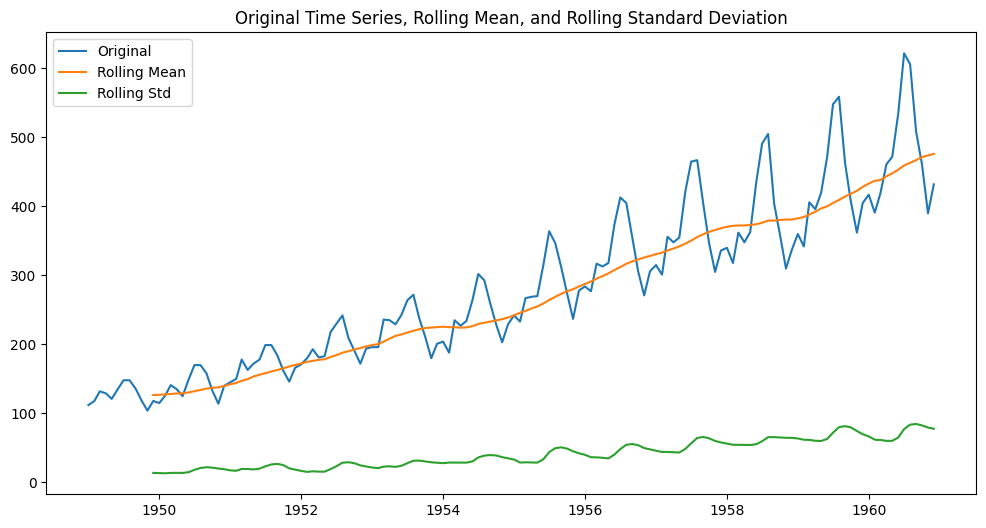

In [14]:
#linplot for the passenger and roll mean and rollStd

plt.figure(figsize=(12, 6))
plt.plot(df['passengers'], label='Original')
plt.plot(df['rollMean'], label='Rolling Mean')
plt.plot(df['rollStd'], label='Rolling Std')
plt.legend()
plt.title('Original Time Series, Rolling Mean, and Rolling Standard Deviation')
plt.show()

#std is Approximately constant throught the line
#Mean is not Coanstant with the X-axis

#**2.Statistical Tests**
### Augmented Dickey-Fuller (ADF) Test:
-  This test checks the null hypothesis that a unit root is present in the time series, indicating non-stationarity.

### Interpretation:
- If the p-value is less than or equal(<=0.05) to 0.05
 -  you reject the null hypothesis.
 - The series is stationary.
- If the p-value is greater than 0.05(>0.05
 - you fail to reject the null hypothesis
 - the series is non-stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller # correct the typo in the module name


In [16]:
#ADF Test Function:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print('Reject the null hypothesis - Data is stationary.')
    else:
        print('Fail to reject the null hypothesis - Data is non-stationary.')




In [17]:
# Example usage
adf_test(df['passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Fail to reject the null hypothesis - Data is non-stationary.


- Since the data is non-stationary, you need to apply transformations to make it stationary.

### **1. Differencing**
- Differencing is the most common technique used to remove trends and stabilize the mean of a time series by subtracting the previous observation from the current one.
- First-Order Differencing:
 - Subtract the previous value from the current value to remove the trend component.
   `df['diff_1'] = df['your_column'].diff()`






In [18]:
df['firstDiff'] = df['passengers'].diff()

In [19]:
df.head()

,year,month,passengers,rollMean,rollStd,firstDiff
yearMonth,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,6.0
1949-03-01,1949,Mar,132,NaN,NaN,14.0
1949-04-01,1949,Apr,129,NaN,NaN,-3.0
1949-05-01,1949,May,121,NaN,NaN,-8.0


In [20]:
df.dropna()

,year,month,passengers,rollMean,rollStd,firstDiff
yearMonth,,,,,,
1949-12-01,1949,Dec,118,126.666667,13.720147,14.0
1950-01-01,1950,Jan,115,126.916667,13.453342,-3.0
1950-02-01,1950,Feb,126,127.583333,13.166475,11.0
1950-03-01,1950,Mar,141,128.333333,13.686977,15.0
1950-04-01,1950,Apr,135,128.833333,13.822467,-6.0
...,...,...,...,...,...,...
1960-08-01,1960,Aug,606,463.333333,83.630500,-16.0
1960-09-01,1960,Sep,508,467.083333,84.617276,-98.0
1960-10-01,1960,Oct,461,471.583333,82.541954,-47.0


In [21]:
# Step 1: Identify rows with NaN values in the 'firstDiff' column
nan_rows = df[pd.isna(df['firstDiff'])]

# Step 2: Get the index of the rows with NaN values
nan_indices = nan_rows.index

# Step 3: Drop the rows with NaN values from the DataFrame
df = df.drop(nan_indices)

# Display the cleaned DataFrame without NaN rows
df.head()


,year,month,passengers,rollMean,rollStd,firstDiff
yearMonth,,,,,,
1949-02-01,1949,Feb,118,NaN,NaN,6.0
1949-03-01,1949,Mar,132,NaN,NaN,14.0
1949-04-01,1949,Apr,129,NaN,NaN,-3.0
1949-05-01,1949,May,121,NaN,NaN,-8.0
1949-06-01,1949,Jun,135,NaN,NaN,14.0


In [22]:
df.isna().sum()

,0
year,0
month,0
passengers,0
rollMean,10
rollStd,10
firstDiff,0


In [23]:
# Example usage for the diff(1)
adf_test(df['firstDiff'])

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Fail to reject the null hypothesis - Data is non-stationary.


In [24]:
df['SecondDiff'] = df['passengers'].diff(2).dropna()
# Apply differencing with lag of 2

In [25]:
# Display the result
df.head()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff
yearMonth,,,,,,,
1949-02-01,1949,Feb,118,NaN,NaN,6.0,NaN
1949-03-01,1949,Mar,132,NaN,NaN,14.0,NaN
1949-04-01,1949,Apr,129,NaN,NaN,-3.0,11.0
1949-05-01,1949,May,121,NaN,NaN,-8.0,-11.0
1949-06-01,1949,Jun,135,NaN,NaN,14.0,6.0


In [26]:
# Step 1: Identify rows with NaN values in the 'SecondDiff' column
nan_rows = df[pd.isna(df['SecondDiff'])]

# Step 2: Get the index of the rows with NaN values
nan_indices = nan_rows.index

# Step 3: Drop the rows with NaN values from the DataFrame
df = df.drop(nan_indices)

# Display the cleaned DataFrame without NaN rows
df.head()


,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff
yearMonth,,,,,,,
1949-04-01,1949,Apr,129,NaN,NaN,-3.0,11.0
1949-05-01,1949,May,121,NaN,NaN,-8.0,-11.0
1949-06-01,1949,Jun,135,NaN,NaN,14.0,6.0
1949-07-01,1949,Jul,148,NaN,NaN,13.0,27.0
1949-08-01,1949,Aug,148,NaN,NaN,0.0,13.0


In [27]:
df.isna().sum()

,0
year,0
month,0
passengers,0
rollMean,8
rollStd,8
firstDiff,0
SecondDiff,0


In [28]:
# Example usage fro the diff(2)
adf_test(df['SecondDiff'])

ADF Statistic: -2.9414812512932156
p-value: 0.04073257688675971
Critical Values:
   1%: -3.482087964046026
   5%: -2.8842185101614626
   10%: -2.578864381347275
Reject the null hypothesis - Data is stationary.


- Now the Passangers column has the stationary.
- let's do the diff(12)

In [29]:
df['Diff12'] = df['passengers'].diff(12)
# Apply differencing with lag of 2

In [30]:
# Step 1: Identify rows with NaN values in the 'SecondDiff' column
nan_rows = df[pd.isna(df['Diff12'])]

# Step 2: Get the index of the rows with NaN values
nan_indices = nan_rows.index

# Step 3: Drop the rows with NaN values from the DataFrame
df = df.drop(nan_indices)

# Display the cleaned DataFrame without NaN rows
df.head()


,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12
yearMonth,,,,,,,,
1950-04-01,1950,Apr,135,128.833333,13.822467,-6.0,9.0,6.0
1950-05-01,1950,May,125,129.166667,13.663710,-10.0,-16.0,4.0
1950-06-01,1950,Jun,149,130.333333,14.760718,24.0,14.0,14.0
1950-07-01,1950,Jul,170,132.166667,18.135016,21.0,45.0,22.0
1950-08-01,1950,Aug,170,134.000000,20.797727,0.0,21.0,22.0


In [31]:
df.isna().sum()

,0
year,0
month,0
passengers,0
rollMean,0
rollStd,0
firstDiff,0
SecondDiff,0
Diff12,0


In [32]:
airP = df.copy(deep = True)

In [33]:
airP.head()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12
yearMonth,,,,,,,,
1950-04-01,1950,Apr,135,128.833333,13.822467,-6.0,9.0,6.0
1950-05-01,1950,May,125,129.166667,13.663710,-10.0,-16.0,4.0
1950-06-01,1950,Jun,149,130.333333,14.760718,24.0,14.0,14.0
1950-07-01,1950,Jul,170,132.166667,18.135016,21.0,45.0,22.0
1950-08-01,1950,Aug,170,134.000000,20.797727,0.0,21.0,22.0


In [34]:
airP['passengers'] = airP['Diff12']

In [35]:
airP.head()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12
yearMonth,,,,,,,,
1950-04-01,1950,Apr,6.0,128.833333,13.822467,-6.0,9.0,6.0
1950-05-01,1950,May,4.0,129.166667,13.663710,-10.0,-16.0,4.0
1950-06-01,1950,Jun,14.0,130.333333,14.760718,24.0,14.0,14.0
1950-07-01,1950,Jul,22.0,132.166667,18.135016,21.0,45.0,22.0
1950-08-01,1950,Aug,22.0,134.000000,20.797727,0.0,21.0,22.0


## **Steps to apply ARIMA:**
- Define the parameters (p, d, q):

  - p(Auto Regressive):  
   - The number of autoregressive terms (lags of the dependent variable).

  - d(Integrate):
   - The number of differences required to make the data stationary
   - (since you already differenced the data, this will be 0).

  - q(Moving average):
   - The number of lagged forecast errors (moving average terms).
- Fit the ARIMA model:

  - Use the ARIMA() function from the statsmodels library to fit the model to the data.


- Evaluate the model:
  - Once the model is fitted, you can make predictions and evaluate how well the model fits the data.

In [36]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

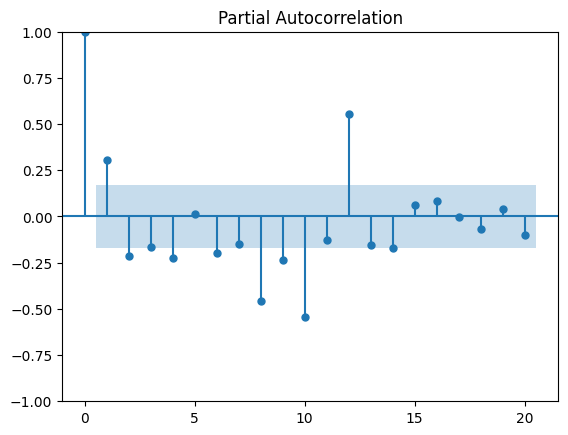

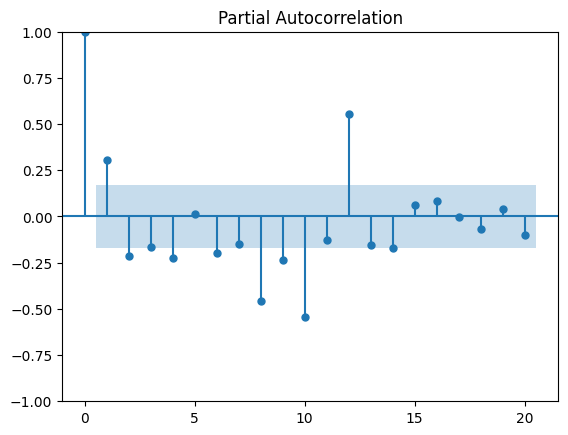

In [37]:
plot_pacf(airP['firstDiff'].dropna(),lags = 20)

p = 1


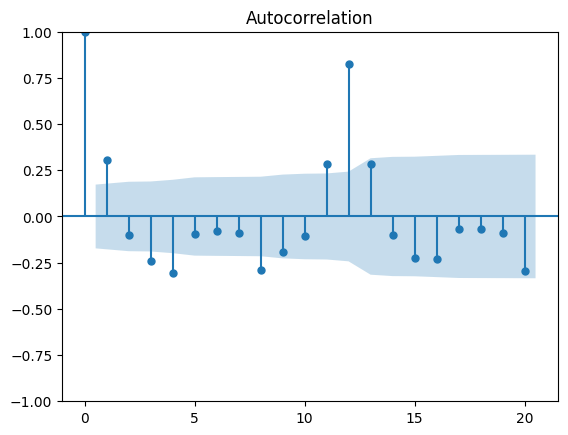

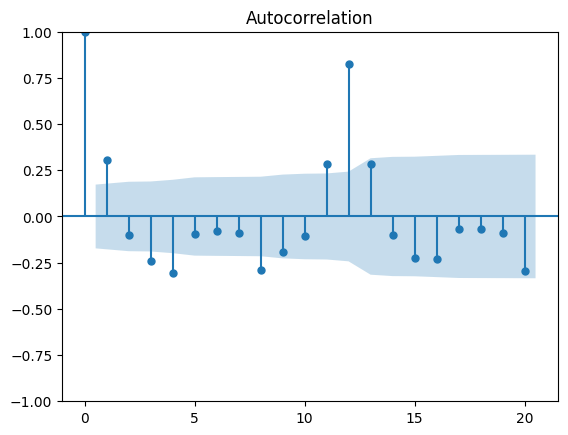

In [38]:
plot_acf(airP['firstDiff'].dropna(),lags = 20)

p = 1
q = 3
d = 1


In [39]:
!pip install pmdarima -q
# This command will install the 'pmdarima' module.
from pmdarima import auto_arima

# Automatically determine p, d, q
stepwise_fit = auto_arima(df['passengers'], start_p=0, start_q=0,
                          max_p=5, max_q=5, seasonal=False,
                          trace=True)
print(stepwise_fit.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1279.923, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1269.502, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1265.431, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1278.474, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1262.939, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1265.146, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1264.894, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1261.419, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1263.795, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1267.820, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

In [40]:
size = int(len(airP) * 0.8)
size

103

In [41]:
train = airP[:size]
test = airP[size:]


In [42]:
train.tail()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12
yearMonth,,,,,,,,
1958-06-01,1958,Jun,13.0,374.166667,55.364632,72.0,87.0,13.0
1958-07-01,1958,Jul,26.0,376.333333,59.590013,56.0,128.0,26.0
1958-08-01,1958,Aug,38.0,379.500000,65.557054,14.0,70.0,38.0
1958-09-01,1958,Sep,0.0,379.500000,65.557054,-101.0,-87.0,0.0
1958-10-01,1958,Oct,12.0,380.500000,65.106207,-45.0,-146.0,12.0


In [43]:
test.head()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12
yearMonth,,,,,,,,
1958-11-01,1958,Nov,5.0,380.916667,64.593074,-49.0,-94.0,5.0
1958-12-01,1958,Dec,1.0,381.000000,64.530472,27.0,-22.0,1.0
1959-01-01,1959,Jan,20.0,382.666667,63.627229,23.0,50.0,20.0
1959-02-01,1959,Feb,24.0,384.666667,61.759553,-18.0,5.0,24.0
1959-03-01,1959,Mar,44.0,388.333333,61.597422,64.0,46.0,44.0


In [44]:
##shapes
##shapes
print("train shape",train.shape)
print("test shape",test.shape)

train shape (103, 8)
test shape (26, 8)


### **ARIMA Model**

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(airP['passengers'], order=(1, 1, 3))  # Adjust p, d, q values as necessary
model_fit_aa = model.fit()

# Make predictions
predictions = model_fit_aa.predict(start=test.index[0], end=test.index[-1])

# Print or visualize results
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1958-11-01    10.106675
1958-12-01    11.087372
1959-01-01     7.929454
1959-02-01    18.738145
1959-03-01    26.502554
1959-04-01    39.141070
1959-05-01    45.530885
1959-06-01    50.721383
1959-07-01    39.109264
1959-08-01    46.147015
1959-09-01    50.767211
1959-10-01    52.937062
1959-11-01    46.344894
1959-12-01    45.868821
1960-01-01    58.055185
1960-02-01    55.580152
1960-03-01    46.193502
1960-04-01    20.958323
1960-05-01    46.462824
1960-06-01    54.974032
1960-07-01    56.494070
1960-08-01    64.343140
1960-09-01    49.820648
1960-10-01    40.666317
1960-11-01    47.528144
1960-12-01    34.928811
Freq: MS, Name: predicted_mean, dtype: float64


In [46]:
airP['arimaPred'] = predictions
airP.tail()  #this is the test precition data

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12,arimaPred
yearMonth,,,,,,,,,
1960-08-01,1960,Aug,47.0,463.333333,83.630500,-16.0,71.0,47.0,64.343140
1960-09-01,1960,Sep,45.0,467.083333,84.617276,-98.0,-114.0,45.0,49.820648
1960-10-01,1960,Oct,54.0,471.583333,82.541954,-47.0,-145.0,54.0,40.666317
1960-11-01,1960,Nov,28.0,473.916667,79.502382,-71.0,-118.0,28.0,47.528144
1960-12-01,1960,Dec,27.0,476.166667,77.737125,42.0,-29.0,27.0,34.928811


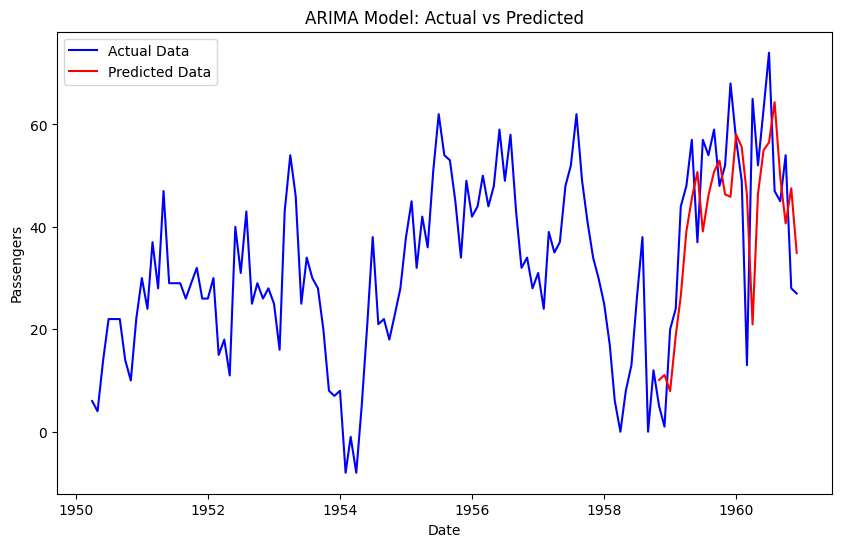

In [47]:

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(airP.index, airP['passengers'], label='Actual Data', color='blue')

# Plot predictions
plt.plot(test.index, predictions, label='Predicted Data', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='yearMonth', ylabel='passengers'>

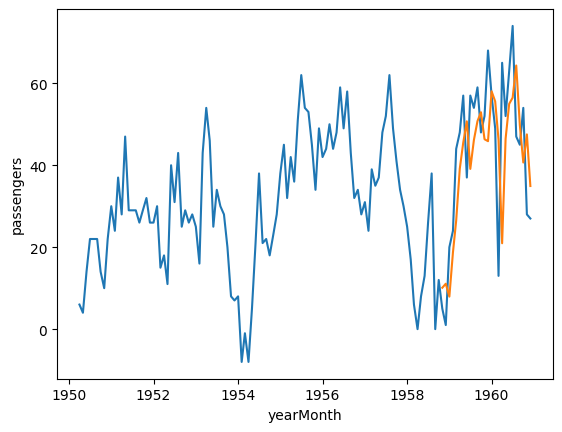

In [48]:
airP.dropna()
sns.lineplot(data = airP,x = airP.index,y = 'passengers')
sns.lineplot(data = airP,x = airP.index,y = 'arimaPred')

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [50]:

#evaluating metrics
mae = mean_absolute_error(test['passengers'],predictions)
rmse = np.sqrt(mean_squared_error(test['passengers'], predictions))

print(f'Mean Absolute Error (MAE) : {mae}')
print(f'Root Mean Square Error (RMSE) : {rmse}')


Mean Absolute Error (MAE) : 12.679507579994755
Root Mean Square Error (RMSE) : 15.731882870428365


### **SARIMAX Model**

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
airP.head()

,year,month,passengers,rollMean,rollStd,firstDiff,SecondDiff,Diff12,arimaPred
yearMonth,,,,,,,,,
1950-04-01,1950,Apr,6.0,128.833333,13.822467,-6.0,9.0,6.0,NaN
1950-05-01,1950,May,4.0,129.166667,13.663710,-10.0,-16.0,4.0,NaN
1950-06-01,1950,Jun,14.0,130.333333,14.760718,24.0,14.0,14.0,NaN
1950-07-01,1950,Jul,22.0,132.166667,18.135016,21.0,45.0,22.0,NaN
1950-08-01,1950,Aug,22.0,134.000000,20.797727,0.0,21.0,22.0,NaN


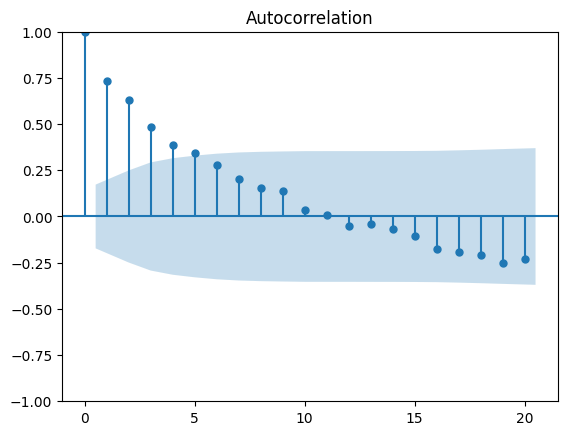

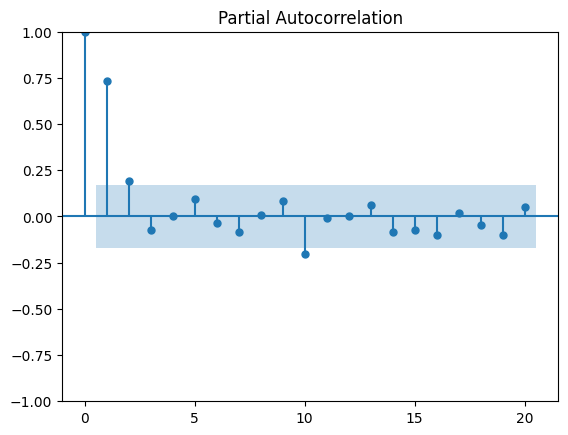

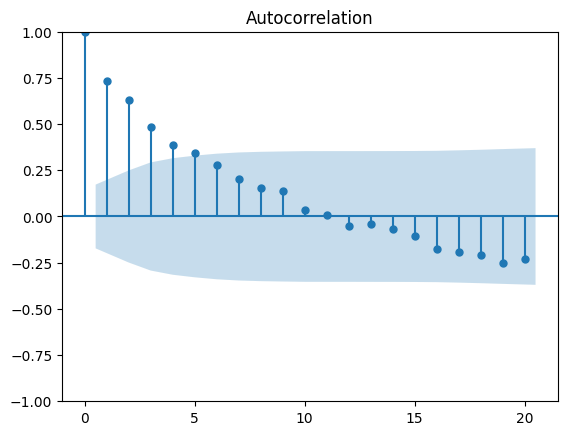

In [53]:
plot_pacf(airP['Diff12'].dropna(),lags = 20)
plot_acf(airP['Diff12'].dropna(),lags = 20)



In [54]:
moel = SARIMAX(airP['passengers'],order = (1,1,3),seasonal_data = (1,1,3,12))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0],end = test.index[-1])
airP['sarimaxPred'] = prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
airP['sarimaxPred'].tail()

,sarimaxPred
yearMonth,
1960-08-01,64.343140
1960-09-01,49.820648
1960-10-01,40.666317
1960-11-01,47.528144
1960-12-01,34.928811


In [56]:
airP['sarimaxPred'].head()

,sarimaxPred
yearMonth,
1950-04-01,NaN
1950-05-01,NaN
1950-06-01,NaN
1950-07-01,NaN
1950-08-01,NaN


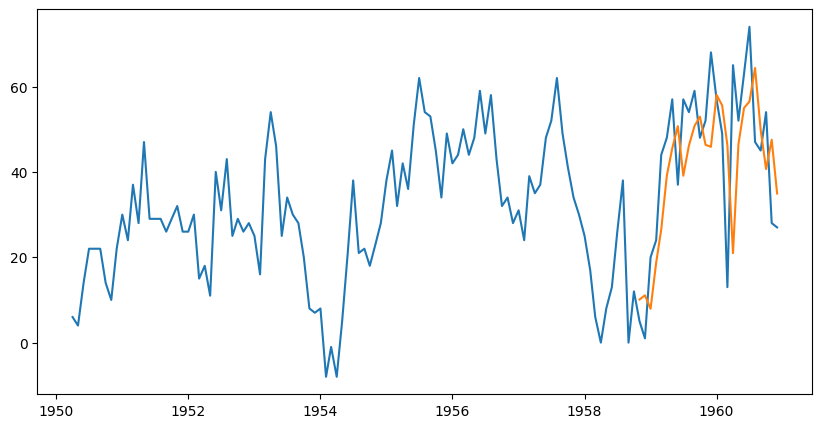

In [57]:
airP.dropna()
plt.figure(figsize = (10,5))
plt.plot(airP['passengers'])
plt.plot(airP['sarimaxPred'])
plt.show()

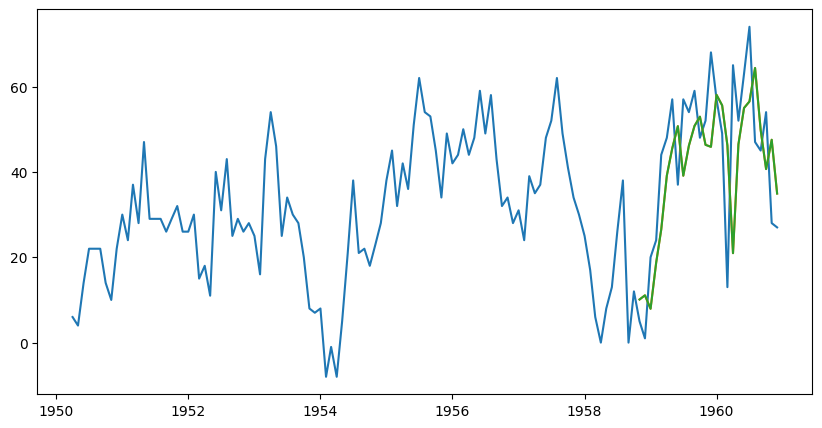

In [58]:
airP.dropna()
plt.figure(figsize = (10,5))
plt.plot(airP['passengers'])
plt.plot(airP['sarimaxPred'])
plt.plot(airP['arimaPred'])

plt.show()

In [59]:

#evaluating metrics
mae = mean_absolute_error(test['passengers'],prediction)
rmse = np.sqrt(mean_squared_error(test['passengers'], prediction))

print(f'Mean Absolute Error (MAE) : {mae}')
print(f'Root Mean Square Error (RMSE) : {rmse}')


Mean Absolute Error (MAE) : 12.679507579994755
Root Mean Square Error (RMSE) : 15.731882870428365


- Find the furter Data

In [60]:
futureDate = pd.DataFrame(pd.date_range(start = '1960-12-01',end = '1962-12-01' ,freq = 'MS'),columns = ['Dates'])
futureDate.set_index('Dates',inplace = True)
futureDate.head()

""
Dates
1960-12-01
1961-01-01
1961-02-01
1961-03-01
1961-04-01


<Axes: >

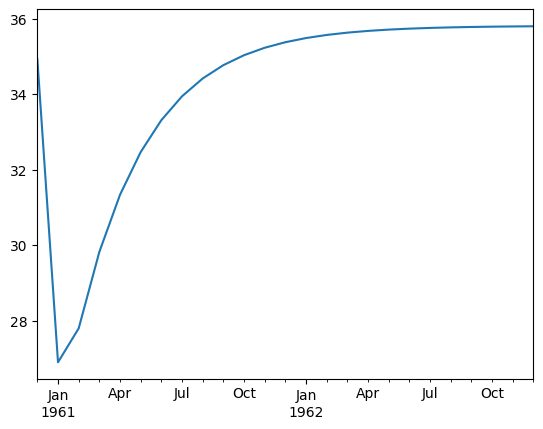

In [61]:
model_fit.predict(start = futureDate.index[0],end = futureDate.index[-1]).plot()

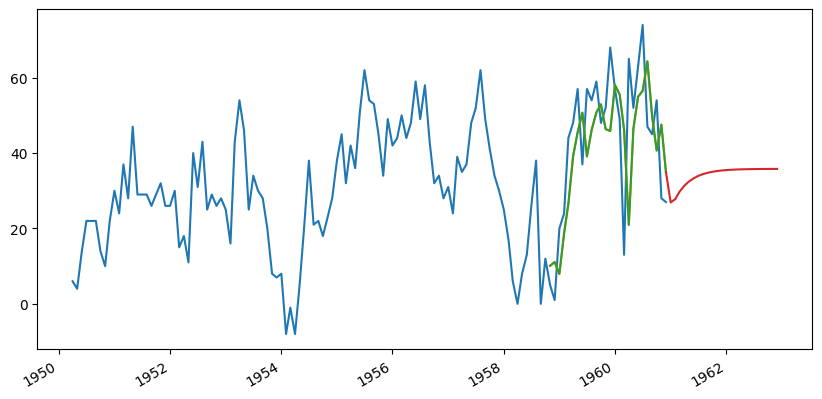

In [62]:
airP.dropna()
plt.figure(figsize = (10,5))
plt.plot(airP['passengers'])
plt.plot(airP['sarimaxPred'])
plt.plot(airP['arimaPred'])
model_fit.predict(start = futureDate.index[0],end = futureDate.index[-1]).plot()
plt.show()

Lets's check with the arimax model

<Axes: >

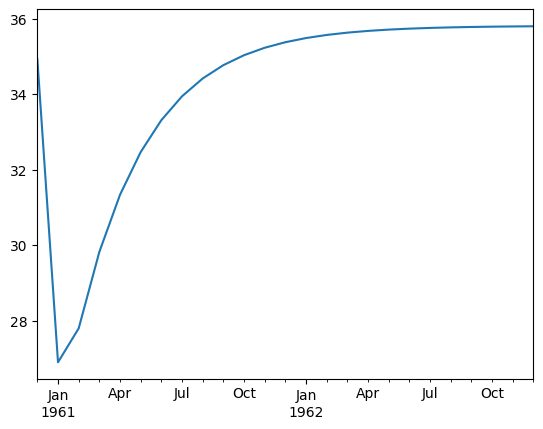

In [63]:
model_fit_aa.predict(start = futureDate.index[0],end = futureDate.index[-1]).plot()

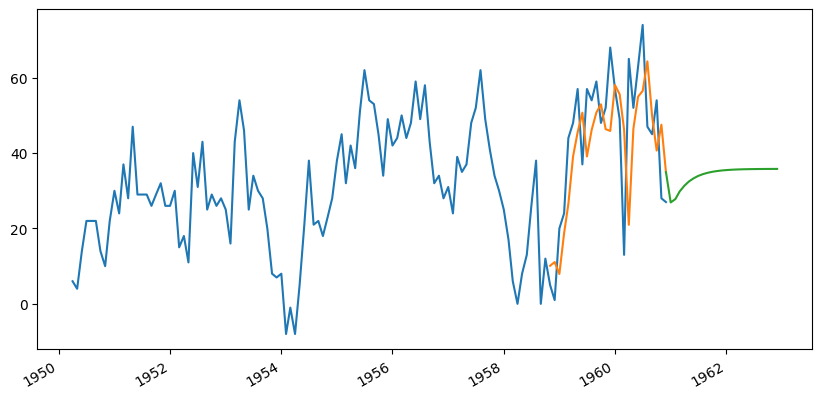

In [64]:
airP.dropna()
plt.figure(figsize = (10,5))
plt.plot(airP['passengers'])
plt.plot(airP['arimaPred'])
model_fit.predict(start = futureDate.index[0],end = futureDate.index[-1]).plot()
plt.show()